# GRAD-CAM visualization 
#### EMG signal and input feature importance 

## 1. Import libraries and data

In [1]:
import pickle
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import sys
from matplotlib import cm

sys.path.append('..')
from utils.utils_classes import RReLU

root_path = "C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI"


Using TensorFlow backend.


Model: there are several:
Conv1D is the original, then several version of conv2D with 6 channels and different layers
with conv2D it has been used a different dimension of the input dataset: use namedataset_big

In [2]:
#data
with open(root_path + '/resources/data_deep/data_ordered/Xtest_ordered.pkl', 'rb') as f:
    Xtest = pickle.load(f)
    

#### use only for conv2d with 6 channels

In [3]:
Xtestset_drop=[]
for patient in range(11):
    X_tmp=np.zeros((len(Xtest[patient]), 6, 512,1))
    for index in range(len(Xtest[patient])):
        X_tmp[index]=np.delete(Xtest[patient][index], [6,7,8,9], axis=0)
    Xtestset_drop.append(X_tmp)

In [4]:

Xtestset_drop=Xtest

In [36]:
#gradcam
patient=2
path = root_path + "/resources/Grad-CAM method 2/conv1D ordered/gradcam_results_patient{}_conv_1D_method2.pkl".format(patient)
with open(path, 'rb') as f:
    gradcam = pickle.load(f)

In [37]:
#model
saved_model = load_model(root_path + '/resources/Conv1D/Conv1D_pat_{}.h5'.format(patient),
                         custom_objects={'RReLU': RReLU})

## 2. ordered data in a list depending on their prediction

In [38]:
classes = 8
preds = saved_model.predict(Xtestset_drop[patient])
labels_preds = np.argmax((preds), axis=1)
print(labels_preds)
print((labels_preds.shape))
Xtest_list = []
for label in np.unique(labels_preds):
    Xtest_list.append(Xtestset_drop[patient][labels_preds == label])

[0 0 0 ... 7 7 7]
(3280,)


In [39]:
print(Xtest_list[0].shape, gradcam[0]["gradcam_values"].shape)

(412, 10, 512, 1) (412, 10, 512)


Select class and example to visualize

In [40]:
cls=1
ex=190

In [41]:
gradcam_value = gradcam[cls]["gradcam_values"]
preds_tmp = saved_model.predict(Xtest_list[cls])[:, cls]
preds = saved_model.predict(Xtest_list[cls])
labels_preds = np.argmax((preds), axis=1)
print(labels_preds[ex])
print(preds_tmp[ex])
#gradcam_value[ex, :, :] = (gradcam_value[ex, :, :])

1
0.99998534


## 3. Plot in a heatmap the selected example

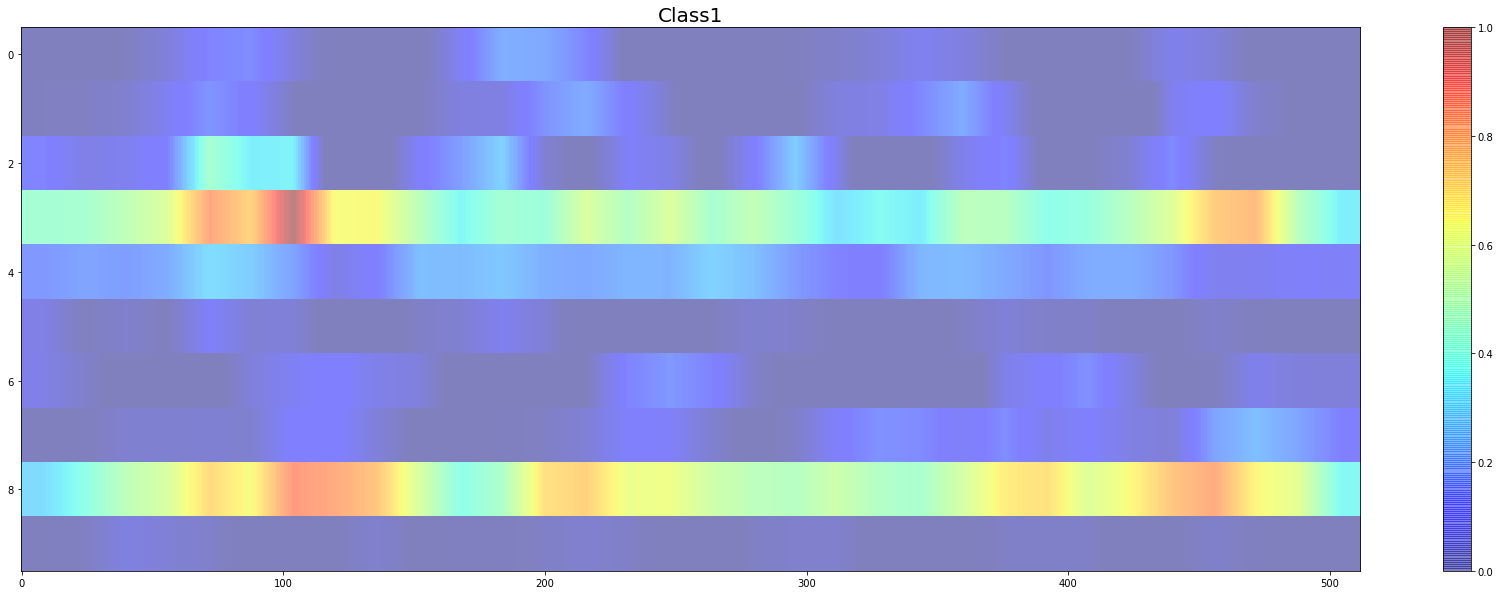

In [42]:
max_val=np.max(gradcam_value[ex, :, :])
min_val=np.min(gradcam_value[ex, :, :])

plt.figure(figsize=(30, 10))
plt.imshow((gradcam_value[ex, :, :] - min_val) / (max_val - min_val), cmap='jet', aspect='auto', alpha=0.5)
#plt.imshow(gradcam_value[ex, :, :], cmap='jet', aspect='auto', alpha=0.5)
plt.colorbar(cmap=gradcam_value[ex, :, :])
#plt.savefig(root_path + "/resources/GRAD-CAM method 2/gradcam_patient{}_ex_{}_label{}_conv1D.jpg".format(patient,ex, cls))
plt.title("Class{}".format(cls), fontsize=20)
plt.show()

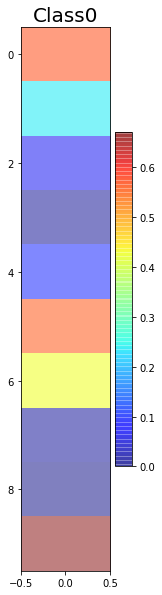

In [102]:
max_val=np.max(gradcam_value[ex, :, :])
min_val=np.min(gradcam_value[ex, :, :])
tmp=(gradcam_value[ex, :, :] - min_val) / (max_val - min_val)
plt.figure(figsize=(2, 10))
plt.imshow(np.expand_dims(np.mean(tmp, axis=1), axis=1), cmap='jet', aspect='auto', alpha=0.5)
#plt.imshow(gradcam_value[ex, :, :], cmap='jet', aspect='auto', alpha=0.5)
plt.colorbar(cmap=gradcam_value[ex, :, :])
plt.savefig(root_path + "/resources/GRAD-CAM method 2/250_riass.jpg".format(patient,ex, cls))
plt.title("Class{}".format(cls), fontsize=20)
plt.show()

In [85]:
tmp=(gradcam_value[ex, :, :] - min_val) / (max_val - min_val)
print(tmp.shape)
np.mean(tmp, axis=1)

(10, 512)


array([0.04329676, 0.05732036, 0.09722397, 0.52615347, 0.19460759,
       0.01925106, 0.04684347, 0.07731749, 0.5942373 , 0.01095892])

## 4. Plot EMG and Gradcam

0.0
0.12630537152290344


<Figure size 432x288 with 0 Axes>

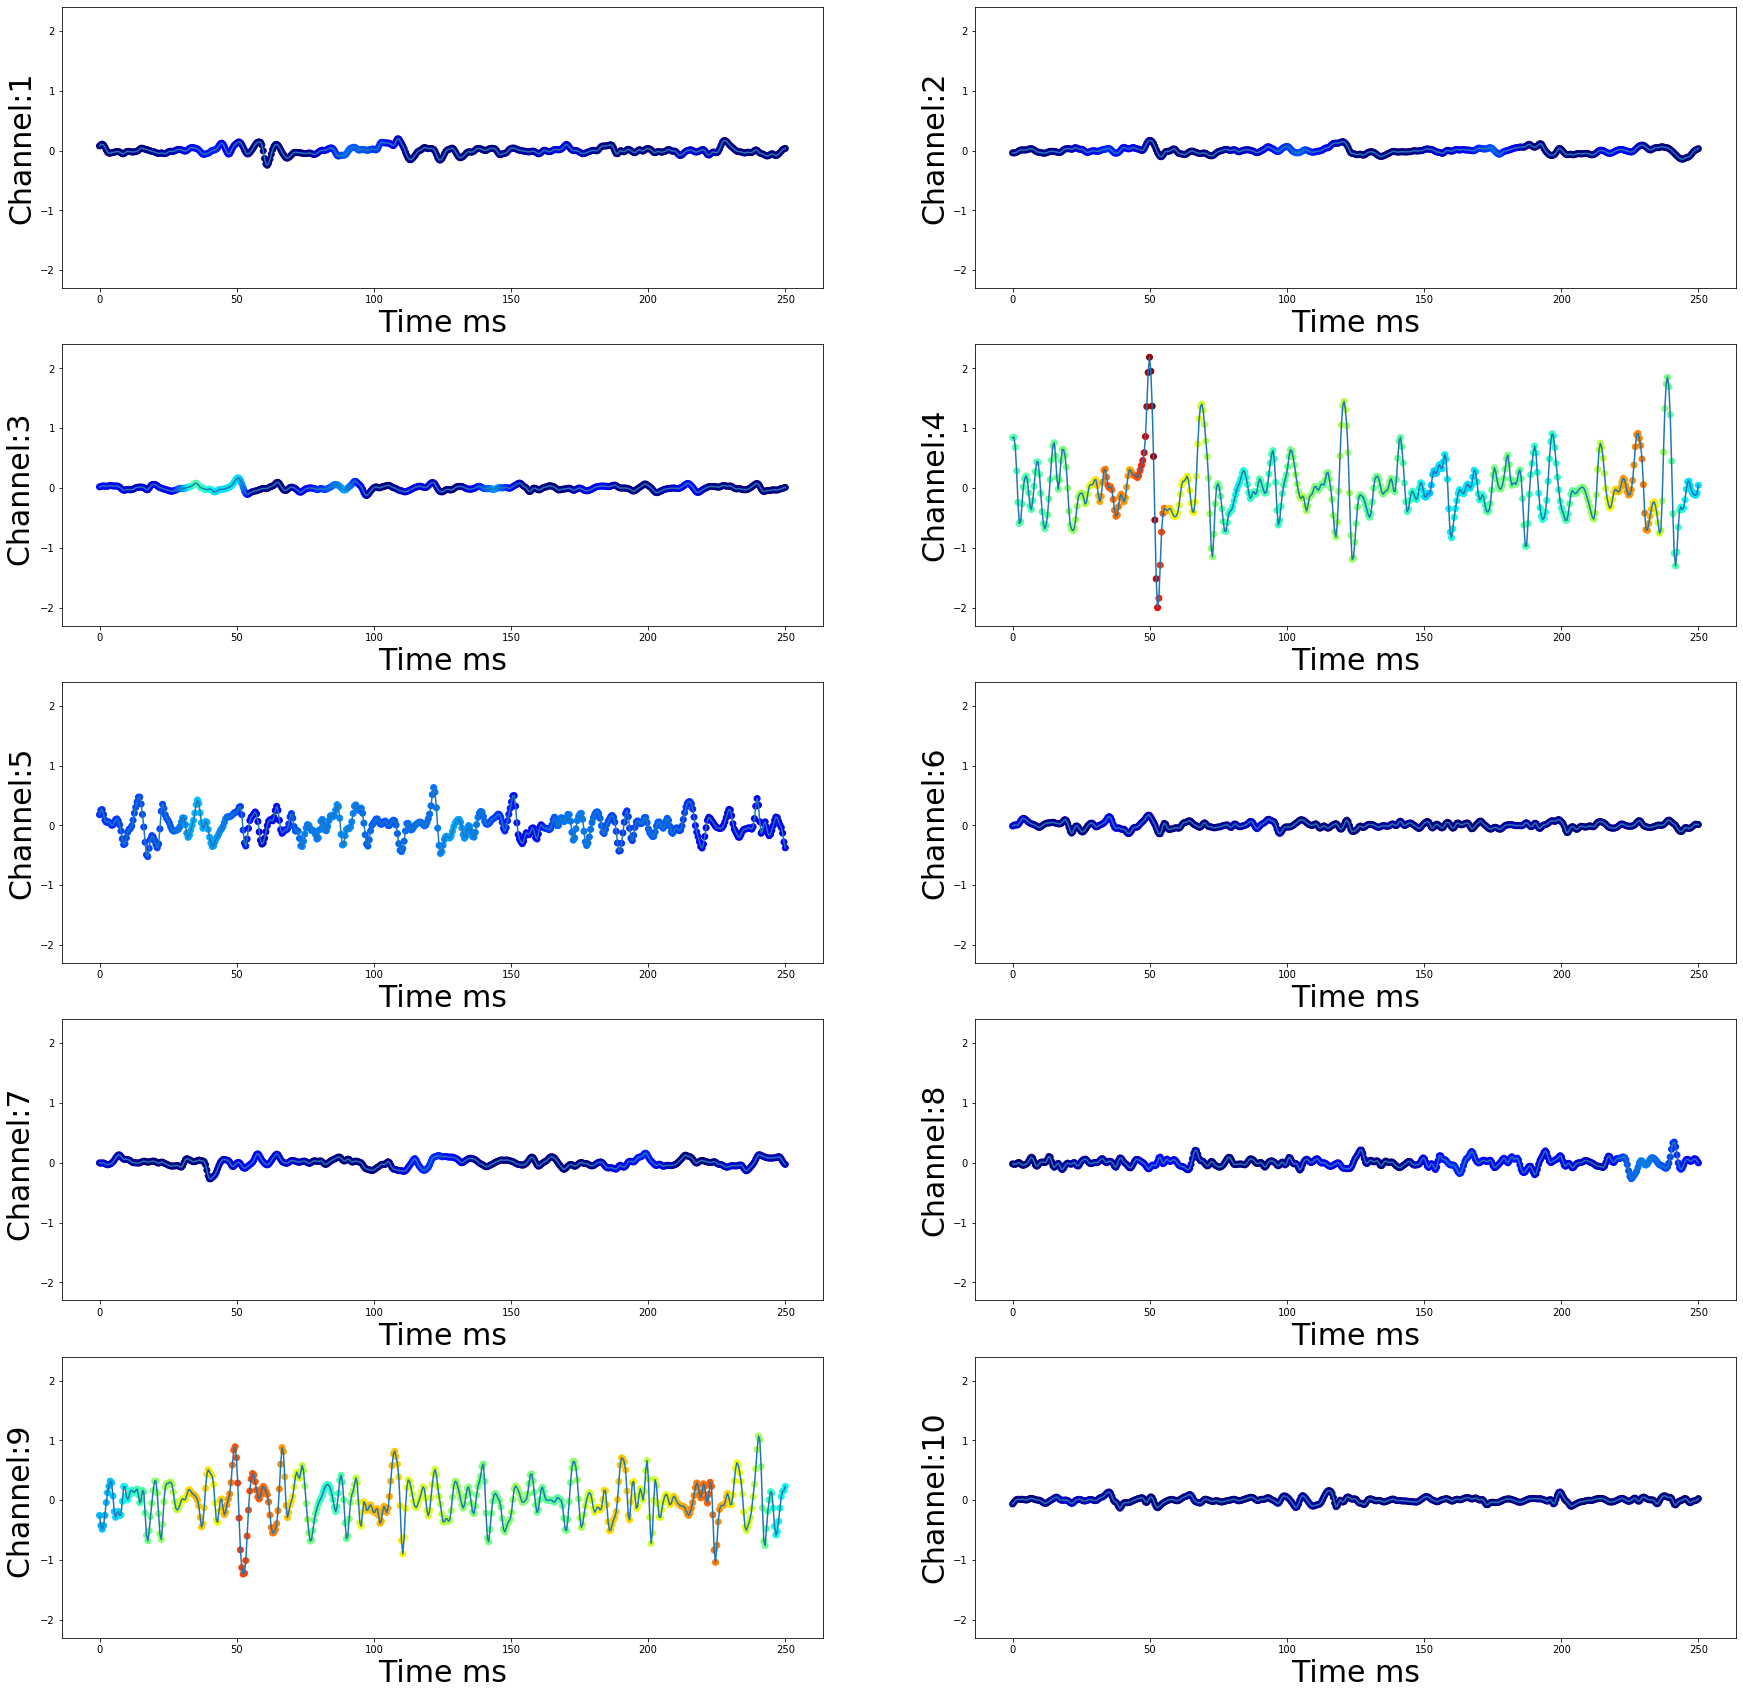

In [56]:
single_instance = Xtest_list[cls]
single_instance = single_instance[ex, :, :]
plt.figure()
time = np.linspace(0, 250, 512)
channel=[0, 6, 9]

plt.figure(figsize=(30,30))
min_val = np.min(gradcam_value[ex,:,:])
print(min_val)
max_val = np.max(gradcam_value[ex,:,:])
print(max_val)

max_lim=2.4
min_lim=-2.3

plt.subplot(521)
ch=0
c_map = gradcam_value[ex, ch, :]
jet = cm.get_cmap('jet', )
c_map_new = np.zeros((len(c_map), 4))
for index in range(len(c_map)):
    c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
plt.plot(time, single_instance[ch, :])
plt.scatter(time, single_instance[ch, :], c=c_map_new)
plt.xlabel("Time ms", fontsize=30)
plt.ylim([min_lim, max_lim])
plt.ylabel("Channel:{}".format(ch+1), fontsize=30)

plt.subplot(522)
ch=1
c_map = gradcam_value[ex, ch, :]
jet = cm.get_cmap('jet', )
c_map_new = np.zeros((len(c_map), 4))
for index in range(len(c_map)):
    c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
plt.plot(time, single_instance[ch, :])
plt.scatter(time, single_instance[ch, :], c=c_map_new)
plt.xlabel("Time ms", fontsize=30)
plt.ylim([min_lim, max_lim])
plt.ylabel("Channel:{}".format(ch+1), fontsize=30)


plt.subplot(523)
ch=2
c_map = gradcam_value[ex, ch, :]
jet = cm.get_cmap('jet', )
c_map_new = np.zeros((len(c_map), 4))
for index in range(len(c_map)):
    c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
plt.plot(time, single_instance[ch, :])
plt.scatter(time, single_instance[ch, :], c=c_map_new)
plt.xlabel("Time ms", fontsize=30)
plt.ylim([min_lim, max_lim])
plt.ylabel("Channel:{} ".format(ch+1), fontsize=30)

plt.subplot(524)
ch=3
c_map = gradcam_value[ex, ch, :]
jet = cm.get_cmap('jet', )
c_map_new = np.zeros((len(c_map), 4))
for index in range(len(c_map)):
    c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
plt.plot(time, single_instance[ch, :])
plt.scatter(time, single_instance[ch, :], c=c_map_new)
plt.xlabel("Time ms", fontsize=30)
plt.ylim([min_lim, max_lim])
plt.ylabel("Channel:{}".format(ch+1), fontsize=30)

plt.subplot(525)
ch=4
c_map = gradcam_value[ex, ch, :]
jet = cm.get_cmap('jet', )
c_map_new = np.zeros((len(c_map), 4))
for index in range(len(c_map)):
    c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
plt.plot(time, single_instance[ch, :])
plt.scatter(time, single_instance[ch, :], c=c_map_new)
plt.xlabel("Time ms", fontsize=30)
plt.ylim([min_lim, max_lim])
plt.ylabel("Channel:{}".format(ch+1), fontsize=30)

plt.subplot(526)
ch=5
c_map = gradcam_value[ex, ch, :]
jet = cm.get_cmap('jet', )
c_map_new = np.zeros((len(c_map), 4))
for index in range(len(c_map)):
    c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
plt.plot(time, single_instance[ch, :])
plt.scatter(time, single_instance[ch, :], c=c_map_new)
plt.xlabel("Time ms", fontsize=30)
plt.ylim([min_lim, max_lim])
plt.ylabel("Channel:{}".format(ch+1), fontsize=30)


plt.subplot(527)
ch=6
c_map = gradcam_value[ex, ch, :]
jet = cm.get_cmap('jet', )
c_map_new = np.zeros((len(c_map), 4))
for index in range(len(c_map)):
    c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
plt.plot(time, single_instance[ch, :])
plt.scatter(time, single_instance[ch, :], c=c_map_new)
plt.xlabel("Time ms", fontsize=30)
plt.ylim([min_lim, max_lim])
plt.ylabel("Channel:{} ".format(ch+1), fontsize=30)

plt.subplot(528)
ch=7
c_map = gradcam_value[ex, ch, :]
jet = cm.get_cmap('jet', )
c_map_new = np.zeros((len(c_map), 4))
for index in range(len(c_map)):
    c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
plt.plot(time, single_instance[ch, :])
plt.scatter(time, single_instance[ch, :], c=c_map_new)
plt.xlabel("Time ms", fontsize=30)
plt.ylim([min_lim, max_lim])
plt.ylabel("Channel:{}".format(ch+1), fontsize=30)

plt.subplot(529)
ch=8
c_map = gradcam_value[ex, ch, :]
jet = cm.get_cmap('jet', )
c_map_new = np.zeros((len(c_map), 4))
for index in range(len(c_map)):
    c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
plt.plot(time, single_instance[ch, :])
plt.scatter(time, single_instance[ch, :], c=c_map_new)
plt.xlabel("Time ms", fontsize=30)
plt.ylim([min_lim, max_lim])
plt.ylabel("Channel:{} ".format(ch+1), fontsize=30)

plt.subplot(5,2,10)
ch=9
c_map = gradcam_value[ex, ch, :]
jet = cm.get_cmap('jet', )
c_map_new = np.zeros((len(c_map), 4))
for index in range(len(c_map)):
    c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
plt.plot(time, single_instance[ch, :])
plt.scatter(time, single_instance[ch, :], c=c_map_new)
plt.xlabel("Time ms", fontsize=30)
plt.ylim([min_lim, max_lim])
plt.ylabel("Channel:{}".format(ch+1), fontsize=30)
plt.savefig(root_path+"/resources/GRAD-CAM method 2/EMG_patient{}_ex{}_label{}_conv1D_all.png".format(patient, ex, cls))

plt.show()

TypeError: legend only accepts two non-keyword arguments

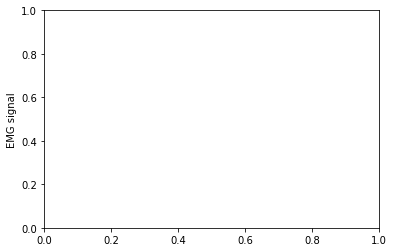

In [319]:
plt.ylabel("EMG signal")
plt.legend("channel 1", "channel 7", "channel 10")
for ch in channel:
    c_map = gradcam_value[ex, ch, :]
    jet = cm.get_cmap('jet', )
    c_map_new = np.zeros((len(c_map), 4))
    for index in range(len(c_map)):
        c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
    plt.plot(time, single_instance[ch, :])
    plt.scatter(time, single_instance[ch, :], c=c_map_new)

#plt.legend(("1", "2", "3", "4", "5", "6"))
plt.title('patient {}, label {}'.format(patient, cls))
plt.xlabel('TIME ms')

#plt.savefig(root_path+"/resources/GRAD-CAM method 2/6 channels 2conv/EMG_patient{}_ex{}_label{}.png".format(patient, ex, cls))

plt.show()

0.0
2.8000831604003906


<Figure size 432x288 with 0 Axes>

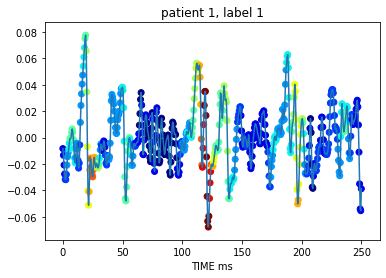

In [152]:
single_instance = Xtest_list[cls]
single_instance = single_instance[ex, :, :]
plt.figure()
time = np.linspace(0, 250, 512)
channel=0


c_map = gradcam_value[ex, channel, :]
min_val = np.min(c_map)
print(min_val)
max_val = np.max(c_map)
print(max_val)

jet = cm.get_cmap('jet', 12)
c_map_new = np.zeros((len(c_map), 4))
for index in range(len(c_map)):
    c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
plt.figure()
plt.plot(time, single_instance[channel, :])
plt.scatter(time, single_instance[channel, :], c=c_map_new)

#plt.legend(("1", "2", "3", "4", "5", "6"))
plt.title('patient {}, label {}'.format(patient, cls))
plt.xlabel('TIME ms')

# plt.savefig(root_path+"/EMG_patient{}_ex{}_label{}.png".format(patient, ex, cls))

plt.show()

In [317]:
patient=0
path = root_path + "/resources/Grad-CAM-not-norm/gradcam_results_patient{}_conv_1D.pkl".format(patient)
with open(path, 'rb') as f:
    gradcam = pickle.load(f)

saved_model = load_model(root_path + '/resources/Conv1D/Conv1D_pat_{}.h5'.format(patient),
                         custom_objects={'RReLU': RReLU})


In [318]:
with open(root_path + '/resources/data_deep/data_not_ordered/Xtest_correct.pkl', 'rb') as f:
    Xtest = pickle.load(f)
preds = saved_model.predict(Xtest[patient])
labels_preds = np.argmax((preds), axis=1)
print(labels_preds)
print((labels_preds.shape))
Xtest_list = []
for label in range(8):
    #Xtest_list.append(Xtestset_drop[patient][ytest[patient]-1 == label])
    Xtest_list.append(Xtest[patient][labels_preds == label])


[5 3 5 ... 5 6 1]
(3072,)


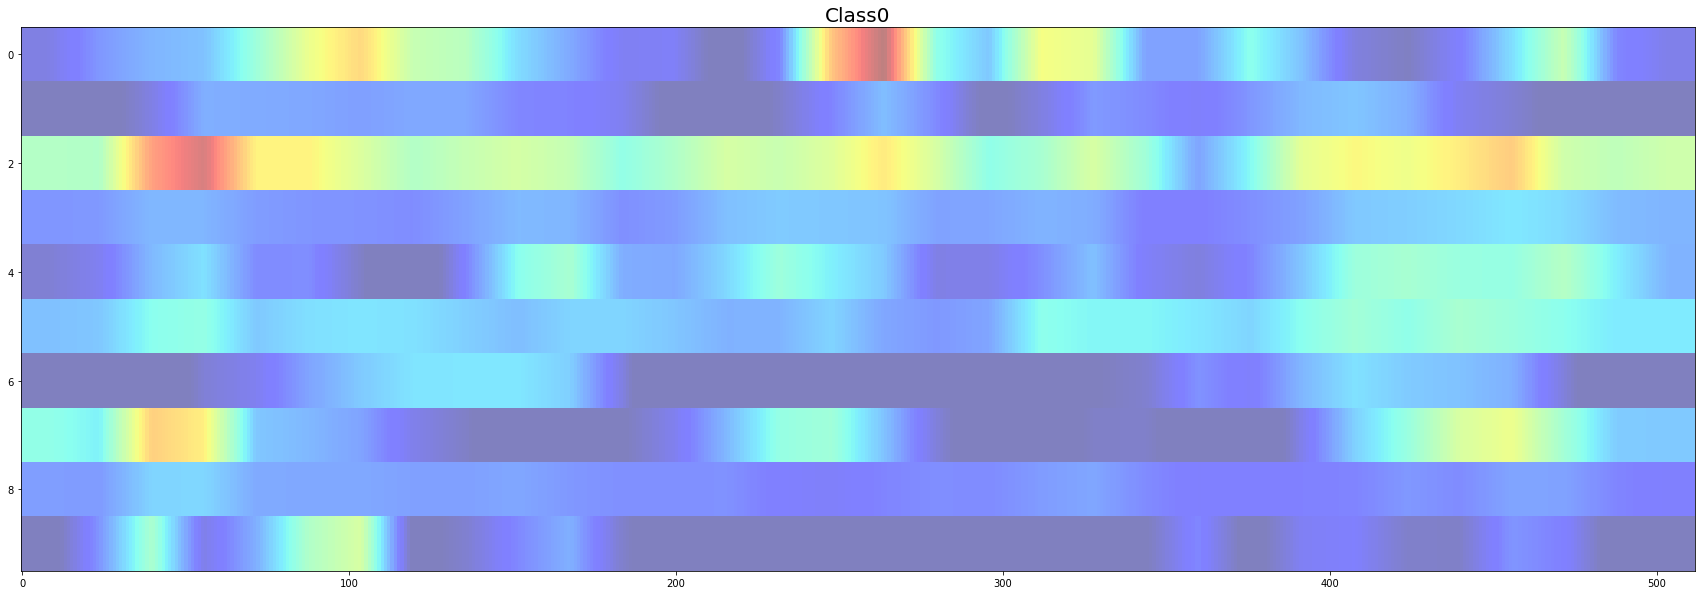

In [319]:
cls=0
ex=63
gradcam_value = gradcam[cls]["gradcam_values"]
max_val=np.max(gradcam_value[ex, :, :])
min_val=np.min(gradcam_value[ex, :, :])
plt.figure(figsize=(30, 10))
plt.imshow((gradcam_value[ex, :, :] - min_val) / (max_val - min_val), cmap='jet', aspect='auto', alpha=0.5)
#plt.savefig(root_path + "/resources/GRAD-CAM method 2/6 channels 2conv/gradcam_patient{}_label{}_conv5.jpg".format(patient, cls))
plt.title("Class{}".format(cls), fontsize=20)
plt.show()

2.714847505558282e-05
8.407881250604987e-05


<Figure size 432x288 with 0 Axes>

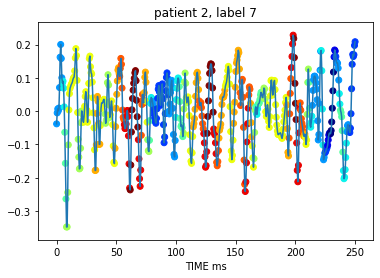

In [295]:
single_instance = Xtest_list[cls]
single_instance = single_instance[ex, :, :]
plt.figure()
time = np.linspace(0, 250, 512)
channel=5


c_map = gradcam_value[ex, channel, :]
min_val = np.min(c_map)
print(min_val)
max_val = np.max(c_map)
print(max_val)

jet = cm.get_cmap('jet', 12)
c_map_new = np.zeros((len(c_map), 4))
for index in range(len(c_map)):
    c_map_new[index, :] = jet((c_map[index] - min_val) / (max_val - min_val))
plt.figure()
plt.plot(time, single_instance[channel, :])
plt.scatter(time, single_instance[channel, :], c=c_map_new)

#plt.legend(("1", "2", "3", "4", "5", "6"))
plt.title('patient {}, label {}'.format(patient, cls))
plt.xlabel('TIME ms')

plt.savefig(root_path+"/resources/Grad-CAM method 2/EMG_patient{}_ex{}_label{}_1D_channel{}.png".format(patient, ex, cls, channel+1))

plt.show()

(512,)


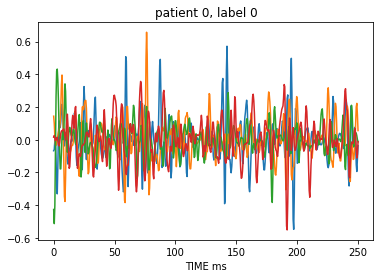

In [328]:
from scipy.signal import correlate
cls=0
ex=50
signal_1 = Xtest_list[cls][ex, 0, :, 0]
signal_2 = Xtest_list[cls][ex, 9, :, 0]
signal_3 = Xtest_list[cls][ex, 6, :, 0]
signal_4 = Xtest_list[cls][ex, 4, :, 0]
print(signal_1.shape)
time=np.linspace(0, 250, 512)
plt.plot(time, signal_1)
plt.plot(time, signal_2)
plt.plot(time, signal_3)
plt.plot(time, signal_4)
plt.title('patient {}, label {}'.format(patient, cls))
plt.xlabel('TIME ms')
#plt.savefig(root_path+"/EMG_patient{}_ex{}_label{}.png".format(patient, ex, cls))

plt.show()

In [331]:
print(np.correlate(signal_3, signal_4))

[0.36999445]


[0 0 0 ... 7 7 7]
(1644,)


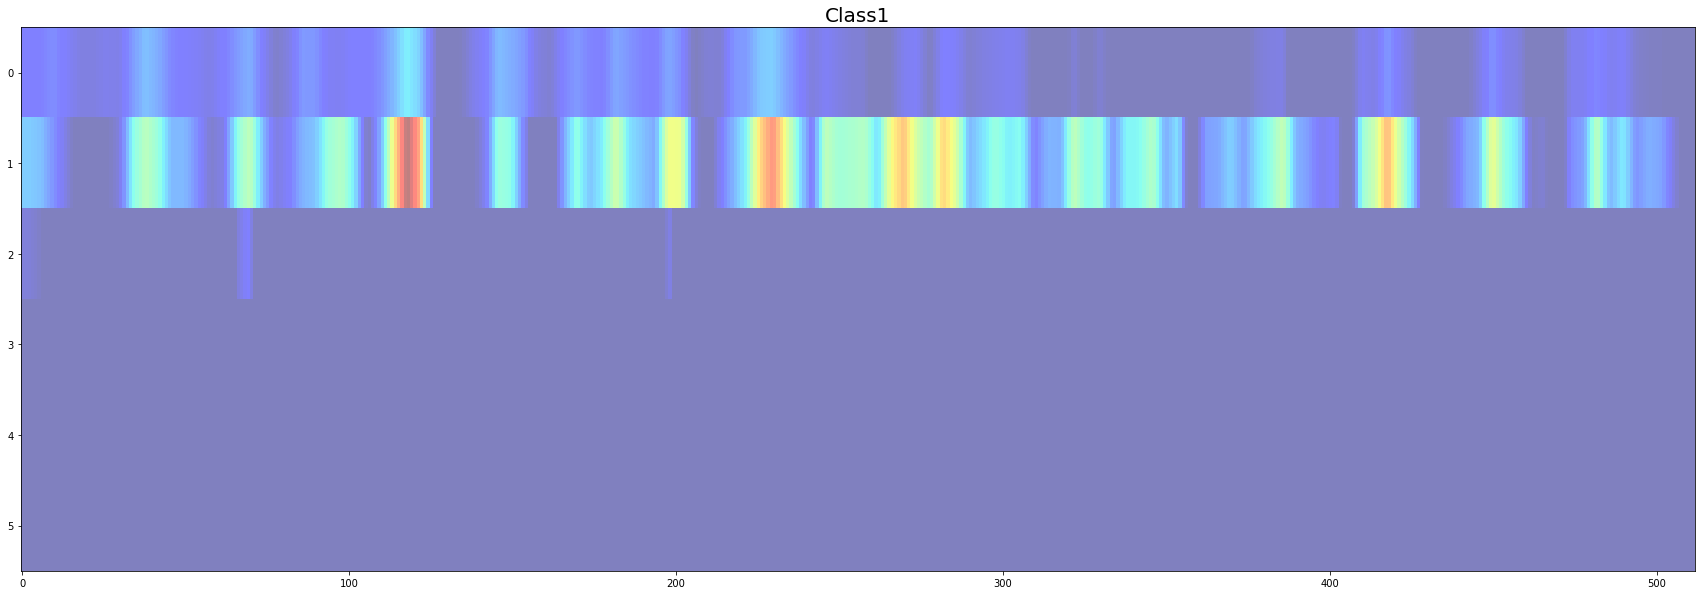

In [91]:
import pickle
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import sys

sys.path.append('..')
from utils.utils_classes import RReLU

root_path = "C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI"


def visualize_gradcam(Xtest, patient):
    """
    Load gradcam values for *patient*, for each label and for each instance;
    weights each instance depending on the prediction value (pred*gradcam),
    average all instances grouped by label

    :param Xtest: dataset of correct instances
    :param patient: patient
    :return:
    """
    path = root_path + "/resources/GRAD-CAM method 2/kernel30/gradcam_results_patient{}_conv_2D_6channels_kernel30.pkl".format(patient)
    with open(path, 'rb') as f:
        gradcam = pickle.load(f)

    saved_model = load_model(root_path + '/resources/new_models/kernel30/Conv2D_6channels_pat_{}_kernel30.h5'.format(patient),
                             custom_objects={'RReLU': RReLU})
    classes = 8
    preds = saved_model.predict(Xtest[patient])
    labels_preds = np.argmax((preds), axis=1)
    print(labels_preds)
    print((labels_preds.shape))
    Xtest_list = []
    for label in np.unique(labels_preds):
        Xtest_list.append(Xtest[patient][labels_preds == label])
    #for cls in range(classes):
    for cls in [1]:
        gradcam_value = gradcam[cls]["gradcam_values"]
        ####preds array
        preds_tmp = saved_model.predict(Xtest_list[cls])[:, cls]
        # weighting each result depending on how much sure was the prediction

        # for index in range(len(preds_tmp)):
        for index in range(15,16):
            gradcam_value[index, :, :] = (gradcam_value[index, :, :] * preds_tmp[index])/np.max(gradcam_value[index, :, :])
        mean_val = np.average(gradcam_value, axis=0)
        # plt.figure(figsize=(30, 10))
        # plt.imshow(mean_val, cmap='jet', aspect='auto', alpha=0.5)
        # #plt.savefig(root_path + "/resources/GRAD-CAM method 2/6 channels 3conv/gradcam_patient{}_label{}_conv5.jpg".format(patient, cls))
        # plt.title("Class{}".format(cls), fontsize=20)
        # plt.show()
        plt.figure(figsize=(30, 10))
        plt.imshow(gradcam_value[index, :, :], cmap='jet', aspect='auto', alpha=0.5)
        #plt.savefig(root_path + "/resources/GRAD-CAM method 2/6 channels 3conv/gradcam_patient{}_label{}_conv5.jpg".format(patient, cls))
        plt.title("Class{}".format(cls), fontsize=20)
        plt.show()
    return

if __name__ == "__main__":
    with open(root_path + '/resources/data_deep/data_ordered/Xtest_big.pkl', 'rb') as f:
        Xtest = pickle.load(f)
    Xtestset_drop=[]
    for patient in range(11):
        X_tmp=np.zeros((len(Xtest[patient]), 6, 512,1))
        for index in range(len(Xtest[patient])):
            X_tmp[index]=np.delete(Xtest[patient][index], [6,7,8,9], axis=0)
        Xtestset_drop.append(X_tmp)

    visualize_gradcam(Xtestset_drop, patient=0)


## RMS and GradCAM


In [62]:
patient=0
path = root_path + "/resources/Grad-CAM-not-norm/gradcam_results_patient{}_conv_1D.pkl".format(patient)
with open(path, 'rb') as f:
    gradcam = pickle.load(f)

saved_model = load_model(root_path + '/resources/Conv1D/Conv1D_pat_{}.h5'.format(patient),
                         custom_objects={'RReLU': RReLU})

with open(root_path + '/resources/data_deep/data_not_ordered/Xtest_correct.pkl', 'rb') as f:
    Xtest = pickle.load(f)
preds = saved_model.predict(Xtest[patient])
labels_preds = np.argmax((preds), axis=1)
print(labels_preds)
print((labels_preds.shape))
Xtest_list = []
for label in range(8):
    #Xtest_list.append(Xtestset_drop[patient][ytest[patient]-1 == label])
    Xtest_list.append(Xtest[patient][labels_preds == label])

[5 3 5 ... 5 6 1]
(3072,)


In [6]:
import pandas as pd

In [63]:
classes=8
cls=0

rms=np.zeros((Xtest_list[cls].shape[0], Xtest_list[cls].shape[1]))
for index in range(gradcam[cls]["gradcam_values"].shape[0]):
    maximum_gd=gradcam[cls]["gradcam_values"][index].max()
    #print(maximum_gd)
    if maximum_gd!=0:
        gradcam[cls]["gradcam_values"][index]=gradcam[cls]["gradcam_values"][index]/maximum_gd
        mean_val=[]
    for channel in range(10):
        rms[index, channel]=((np.sum(Xtest_list[cls][index,channel,:,0]**2))/512)**0.5
mean_tot=np.average((gradcam[cls]["gradcam_values"]), axis=2)
print(mean_tot.shape)
corr_df=pd.DataFrame(data=mean_tot, columns=["channel_{}".format(i) for i in range(10)])
rms_df=pd.DataFrame(data=rms, columns=["RMS_{}".format(i) for i in range (10)])
corr_df=pd.concat([corr_df, rms_df], axis=1)
for channel in range(10):
    rms=Xtest_list[cls]

(417, 10)


In [67]:
corr_matrix=corr_df.corr(method ='pearson')
corr_matrix

,channel_0,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,channel_9,RMS_0,RMS_1,RMS_2,RMS_3,RMS_4,RMS_5,RMS_6,RMS_7,RMS_8,RMS_9
channel_0,1.000000,0.526623,0.026381,-0.740358,0.323886,0.562890,0.850894,-0.228020,-0.449082,0.899199,0.131663,0.311146,-0.114521,-0.408100,-0.209114,0.006969,0.051066,-0.324096,0.055647,0.178995
channel_1,0.526623,1.000000,-0.134407,-0.243564,0.201000,0.173789,0.594444,-0.259870,0.011781,0.582919,0.046710,0.278151,0.036479,-0.283936,-0.083105,0.049079,0.066897,-0.122530,-0.040712,0.072066
channel_2,0.026381,-0.134407,1.000000,0.180937,0.436512,0.594945,-0.004182,0.446443,0.378655,-0.140390,-0.392943,-0.239468,-0.218179,-0.076687,-0.208321,-0.438724,-0.499402,-0.012413,-0.398463,-0.415796
channel_3,-0.740358,-0.243564,0.180937,1.000000,-0.138602,-0.388438,-0.628651,0.330105,0.605468,-0.697073,-0.211187,-0.361646,-0.069853,0.113254,-0.094785,-0.238819,-0.201187,0.130636,-0.313898,-0.244154
channel_4,0.323886,0.201000,0.436512,-0.138602,1.000000,0.651864,0.321305,0.259415,0.137173,0.314131,-0.153897,0.027818,-0.031681,-0.031637,-0.027836,-0.161411,-0.229433,-0.073771,-0.200130,-0.153811
channel_5,0.562890,0.173789,0.594945,-0.388438,0.651864,1.000000,0.537839,0.072999,0.028043,0.463925,-0.305637,-0.025046,-0.174352,-0.177281,-0.108753,-0.290191,-0.385981,-0.120851,-0.229257,-0.283815
channel_6,0.850894,0.594444,-0.004182,-0.628651,0.321305,0.537839,1.000000,-0.230105,-0.382020,0.902845,0.014279,0.209224,-0.190406,-0.387716,-0.203837,-0.092433,-0.007807,-0.349533,-0.030605,0.072955
channel_7,-0.228020,-0.259870,0.446443,0.330105,0.259415,0.072999,-0.230105,1.000000,0.042628,-0.220191,-0.096048,-0.132983,-0.164732,-0.106277,-0.183075,-0.167422,-0.182318,-0.269012,-0.096342,-0.108534
channel_8,-0.449082,0.011781,0.378655,0.605468,0.137173,0.028043,-0.382020,0.042628,1.000000,-0.512420,-0.445351,-0.387546,0.012388,0.257297,0.050686,-0.336639,-0.408439,0.348620,-0.436727,-0.498429
channel_9,0.899199,0.582919,-0.140390,-0.697073,0.314131,0.463925,0.902845,-0.220191,-0.512420,1.000000,0.144680,0.268416,-0.170730,-0.444977,-0.237021,0.001220,0.079199,-0.419268,0.049084,0.208725


In [53]:
corr_df.corr(method ='pearson')

,channel_0,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,channel_9,RMS_0,RMS_1,RMS_2,RMS_3,RMS_4,RMS_5,RMS_6,RMS_7,RMS_8,RMS_9
channel_0,1.000000,0.526623,0.026381,-0.740358,0.323886,0.562890,0.850894,-0.228020,-0.449082,0.899199,0.131663,0.311146,-0.114521,-0.408100,-0.209114,0.006969,0.051066,-0.324096,0.055647,0.178995
channel_1,0.526623,1.000000,-0.134407,-0.243564,0.201000,0.173789,0.594444,-0.259870,0.011781,0.582919,0.046710,0.278151,0.036479,-0.283936,-0.083105,0.049079,0.066897,-0.122530,-0.040712,0.072066
channel_2,0.026381,-0.134407,1.000000,0.180937,0.436512,0.594945,-0.004182,0.446443,0.378655,-0.140390,-0.392943,-0.239468,-0.218179,-0.076687,-0.208321,-0.438724,-0.499402,-0.012413,-0.398463,-0.415796
channel_3,-0.740358,-0.243564,0.180937,1.000000,-0.138602,-0.388438,-0.628651,0.330105,0.605468,-0.697073,-0.211187,-0.361646,-0.069853,0.113254,-0.094785,-0.238819,-0.201187,0.130636,-0.313898,-0.244154
channel_4,0.323886,0.201000,0.436512,-0.138602,1.000000,0.651864,0.321305,0.259415,0.137173,0.314131,-0.153897,0.027818,-0.031681,-0.031637,-0.027836,-0.161411,-0.229433,-0.073771,-0.200130,-0.153811
channel_5,0.562890,0.173789,0.594945,-0.388438,0.651864,1.000000,0.537839,0.072999,0.028043,0.463925,-0.305637,-0.025046,-0.174352,-0.177281,-0.108753,-0.290191,-0.385981,-0.120851,-0.229257,-0.283815
channel_6,0.850894,0.594444,-0.004182,-0.628651,0.321305,0.537839,1.000000,-0.230105,-0.382020,0.902845,0.014279,0.209224,-0.190406,-0.387716,-0.203837,-0.092433,-0.007807,-0.349533,-0.030605,0.072955
channel_7,-0.228020,-0.259870,0.446443,0.330105,0.259415,0.072999,-0.230105,1.000000,0.042628,-0.220191,-0.096048,-0.132983,-0.164732,-0.106277,-0.183075,-0.167422,-0.182318,-0.269012,-0.096342,-0.108534
channel_8,-0.449082,0.011781,0.378655,0.605468,0.137173,0.028043,-0.382020,0.042628,1.000000,-0.512420,-0.445351,-0.387546,0.012388,0.257297,0.050686,-0.336639,-0.408439,0.348620,-0.436727,-0.498429
channel_9,0.899199,0.582919,-0.140390,-0.697073,0.314131,0.463925,0.902845,-0.220191,-0.512420,1.000000,0.144680,0.268416,-0.170730,-0.444977,-0.237021,0.001220,0.079199,-0.419268,0.049084,0.208725


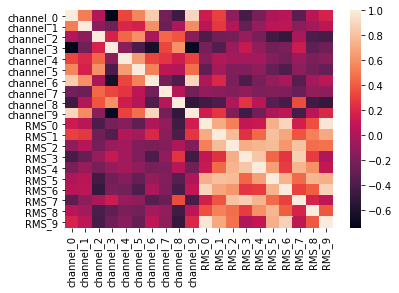

In [66]:
import seaborn as sns
sns.heatmap(corr_matrix)